<a href="https://colab.research.google.com/github/kailashDataScience/newproject/blob/main/Gold_price_prediction_with_Yfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 
from sklearn.linear_model import LinearRegression
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline 
plt.style.use('seaborn-darkgrid')
import yfinance as yf

<ipython-input-1-b0dcc9f5d888>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


[*********************100%***********************]  1 of 1 completed
70.0


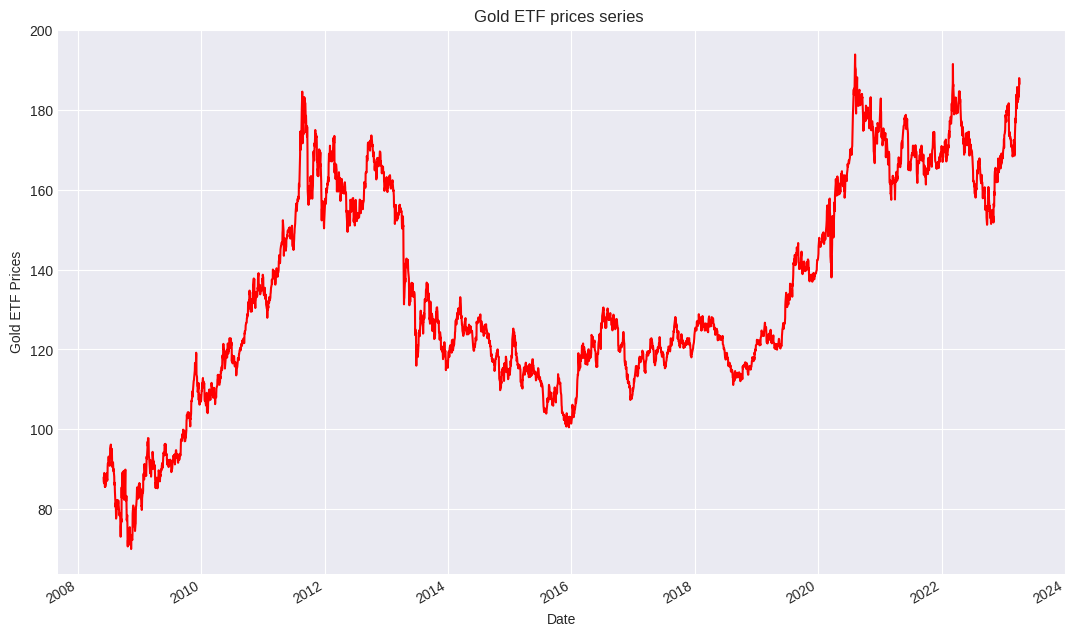

In [ ]:
import datetime as dt

current_date = dt.datetime.now()

#get the data 
df = yf.download('GLD','2008-06-01', current_date,auto_adjust =True )


#df = yf.download('GLD', '2008-01-01', '2020-6-22', auto_adjust=True)
df = df[['Close']]
high = df['Close'].min()
print(high)
df = df.dropna()
df.Close.plot(figsize=(13,8),color = 'r')
plt.ylabel("Gold ETF Prices")
plt.title("Gold ETF prices series ")
plt.show()

In [ ]:
#define explanatory variables 

df['s_3'] = df['Close'].rolling(window = 3).mean()
df['s_9'] = df['Close'].rolling(window = 3).mean()
df['next_day_price'] = df['Close'].shift(-1)
df = df.dropna()
x = df[['s_3','s_9']]

y = df['next_day_price']

In [ ]:
t = .8
t = int(t*len(df))

x_train =  x[:t]
y_train =  y[:t]

x_test =  x[t:]
y_test =  y[t:]


In [ ]:
linear = LinearRegression().fit(x_train,y_train)
print("Linear regression model ")
print("Gold ETF Price (y) = % .2f * 3 days moving averrage (x1)  \
+  %.2f * 9 Days Moving Average (x2) \
+  %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))

Linear regression model 
Gold ETF Price (y) =  0.50 * 3 days moving averrage (x1)  +  0.50 * 9 Days Moving Average (x2) +  0.35 (constant)


                 price
Date                  
2020-04-17  160.672990
2020-04-20  159.958038
2020-04-21  158.927180
2020-04-22  159.977984
2020-04-23  161.188409
...                ...
2023-03-30  183.291960
2023-03-31  183.218802
2023-04-03  183.887194
2023-04-04  185.150825
2023-04-05  186.683808

[748 rows x 1 columns]


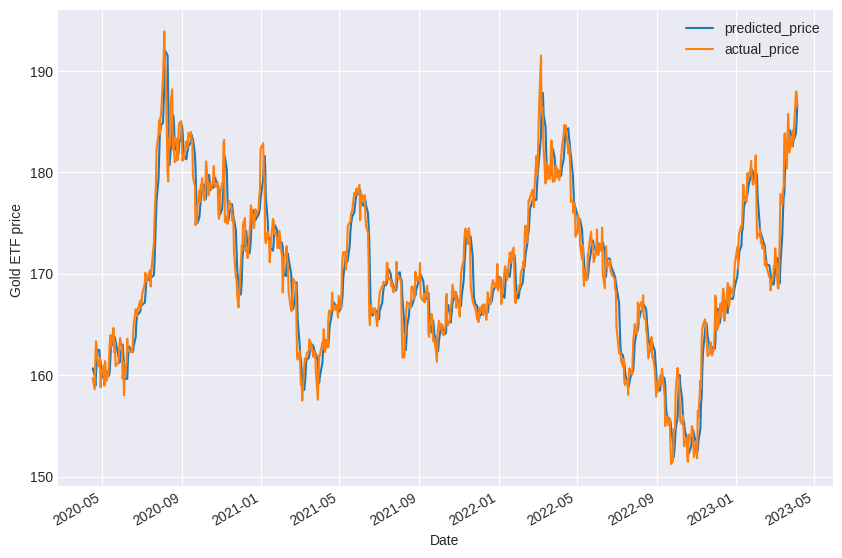

In [ ]:
predicted_price = linear.predict(x_test)
predicted_price = pd.DataFrame(predicted_price, index = y_test.index, columns = ['price'])
print(predicted_price)
predicted_price.plot(figsize=(10,7))
#plt.figure(figsize=(10,7))
y_test.plot()
plt.legend(['predicted_price','actual_price'])
plt.ylabel("Gold ETF price ")
plt.show()

In [ ]:
# R square 

r2_score = linear.score(x[t:],y[t:])*100
print("{0:.2f}".format(r2_score))

93.07


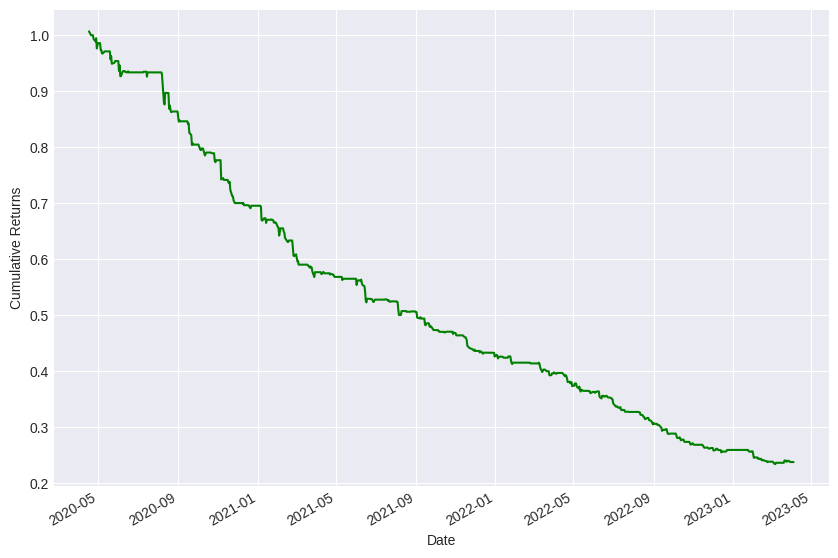

In [ ]:
gold = pd.DataFrame()
#print(gold)

gold['price'] = df[t:]['Close']
gold['predicted_price_next_day'] = predicted_price
gold['actual_price_next_day'] = y_test
gold['gold_returns'] = gold['price'].pct_change().shift(-1)
gold['signal'] = np.where(gold.predicted_price_next_day.shift(-1) < gold.predicted_price_next_day, 1,0)

gold['stratergy_returns'] = gold.signal * gold['gold_returns']
((gold['stratergy_returns'] + 1).cumprod()).plot(figsize=(10,7),color = 'g')
plt.ylabel('Cumulative Returns')

plt.show()

In [ ]:
# calculate the sharp ratio 

sharp = gold['stratergy_returns'].mean() / gold['stratergy_returns'].std() * (252 ** 0.5)
'Sharp Ratio %.2f ' %  (sharp)

'Sharp Ratio -4.52 '

How to use this model to prdict daily moves

In [ ]:
# import  datetime and get todays date 
import datetime as dt
from sklearn import metrics

current_date = dt.datetime.now() 
#print(current_date)

#get the data 
data = yf.download('GLD','2006-06-01', current_date,auto_adjust =True )
data['s_3'] = data['Close'].rolling(window = 3).mean()
data['s_9'] = data['Close'].rolling(window = 9).mean()
data = data.dropna()

data['predicted_gold_price'] = linear.predict(data[['s_3','s_9']])

#print(data)
data['signal'] = np.where(data.predicted_gold_price.shift(1) < data.predicted_gold_price,"Buy","No position")

# print the forcast

data.tail()[['signal','predicted_gold_price']]





[*********************100%***********************]  1 of 1 completed


<ipython-input-11-37be9211d608>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predicted_gold_price'] = linear.predict(data[['s_3','s_9']])
<ipython-input-11-37be9211d608>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['signal'] = np.where(data.predicted_gold_price.shift(1) < data.predicted_gold_price,"Buy","No position")


,signal,predicted_gold_price
Date,,
2023-03-31,No position,183.148416
2023-04-03,Buy,183.713724
2023-04-04,Buy,184.597156
2023-04-05,Buy,185.479480
2023-04-06,Buy,185.961104


In [ ]:
!pip install tensorflow


In [ ]:
pip install pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
